In [1]:
#import neccessery library

import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loanPrediction
#Analytic Vidya
#link#https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/#ProblemStatement#
train=pd.read_csv("C://Users/Satyam Meena/Desktop/Data Science/Data/Loan_Prediction/train_ctrUa4K.csv")
test=pd.read_csv("C://Users/Satyam Meena/Desktop/Data Science/Data/Loan_Prediction/test_lAUu6dG.csv")

In [3]:
loan_id=test['Loan_ID']

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.shape

(614, 13)

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
test.shape

(367, 12)

In [8]:
test['Loan_Status']='test'

In [9]:
data=pd.concat([train, test],ignore_index=True)

In [10]:
train.shape,test.shape,data.shape
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [12]:
#handling missing values

data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [14]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
var_mod=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [16]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,981.00000,981.000000,981.000000
mean,5179.795107,1601.916330,142.51153,342.201873,0.835920
std,5695.104533,2718.772806,76.34777,64.432886,0.355304
min,0.000000,0.000000,9.00000,6.000000,0.000000
25%,2875.000000,0.000000,101.00000,360.000000,1.000000
50%,3800.000000,1110.000000,128.00000,360.000000,1.000000
75%,5516.000000,2365.000000,160.00000,360.000000,1.000000
max,81000.000000,41667.000000,700.00000,480.000000,1.000000


In [17]:
data=data.drop(columns='Loan_ID')

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in var_mod:
    data[i]=le.fit_transform(data[i])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             981 non-null    int32  
 1   Married            981 non-null    int32  
 2   Dependents         981 non-null    int32  
 3   Education          981 non-null    int32  
 4   Self_Employed      981 non-null    int32  
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    int32  
 11  Loan_Status        981 non-null    object 
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 69.1+ KB


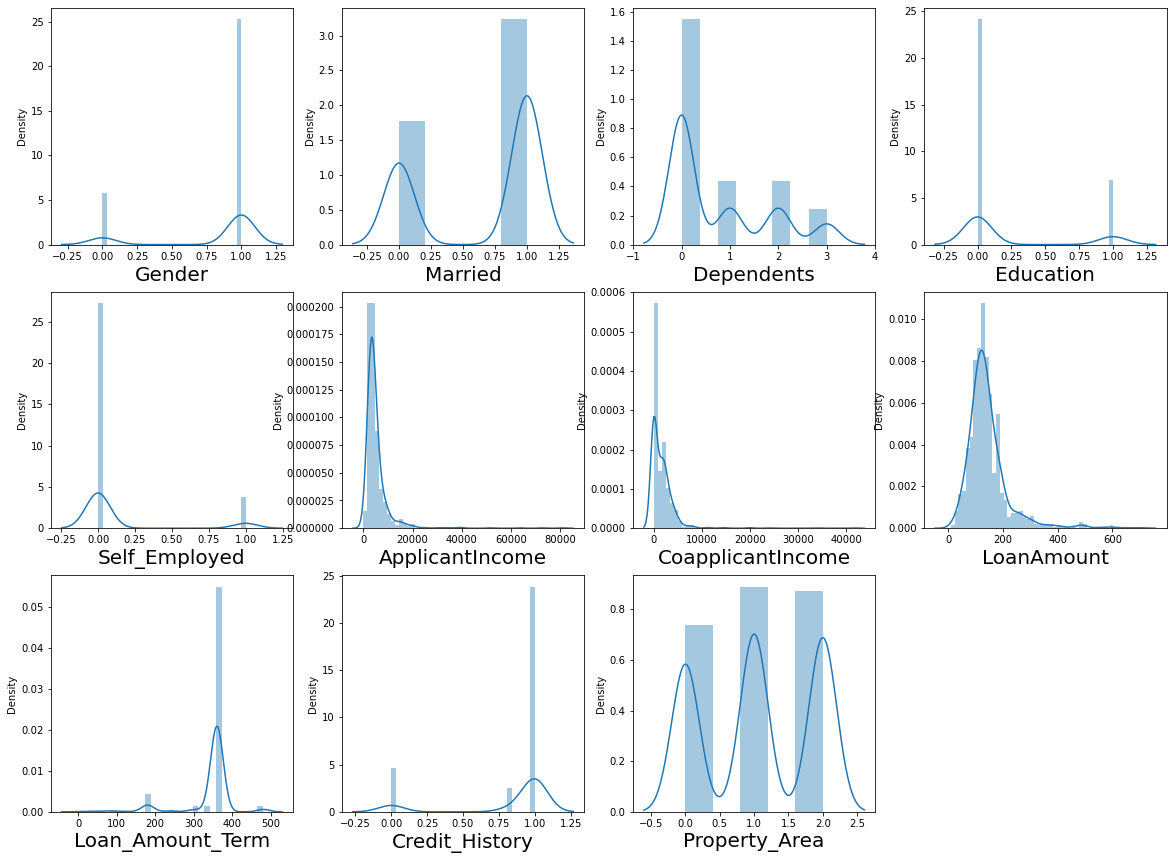

In [20]:
#visualization
#distribution
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=11:
        ax=plt.subplot(4,4,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

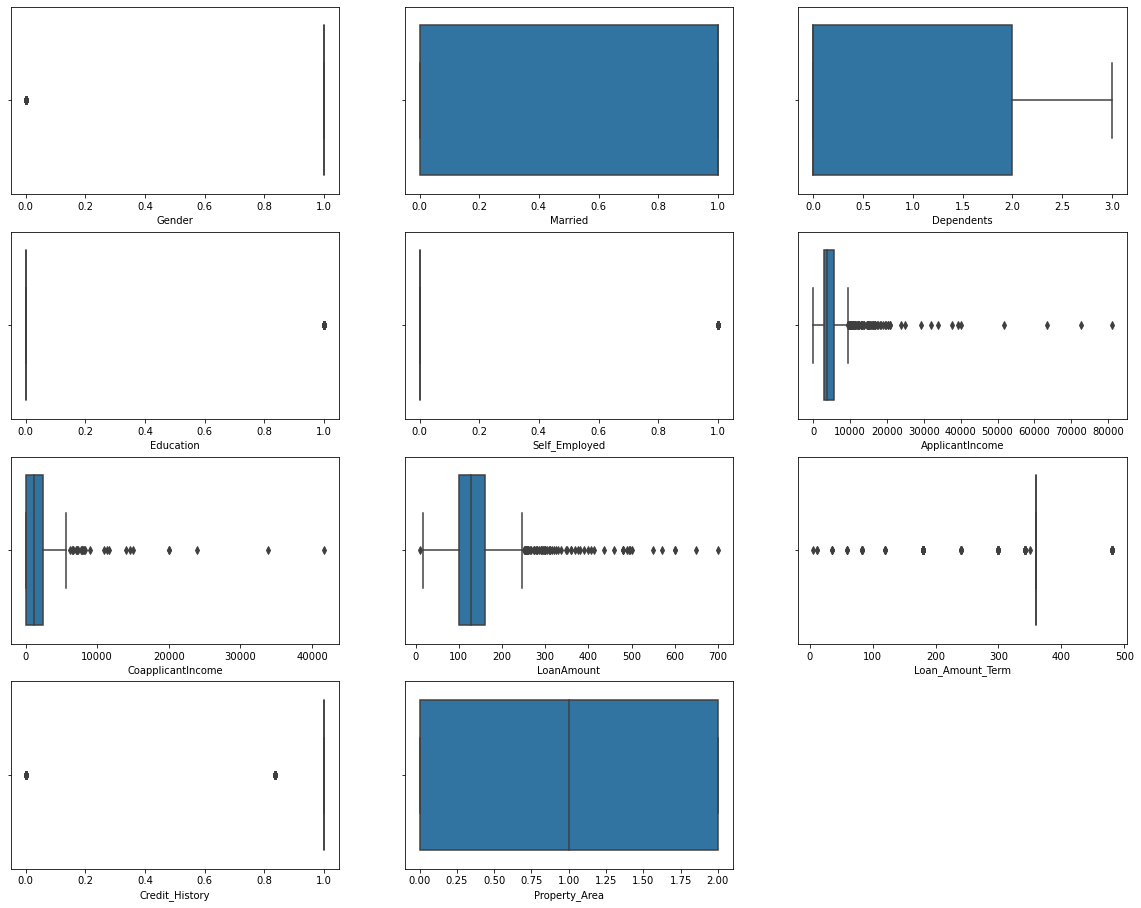

In [21]:
# Visulize the outliers using boxplot
plt.figure(figsize=(20,20))
plotno=1
for col in data:
    if plotno<=11:
        plt.subplot(5,3,plotno)
        sns.boxplot(data[col])
        plt.xlabel(col,fontsize=10)
    plotno+=1
plt.show()

In [22]:
#Divide into test and train:
train = data.loc[data['Loan_Status']!="test"]
test = data.loc[data['Loan_Status']=="test"]
train.shape,test.shape

((614, 12), (367, 12))

In [23]:
train['Loan_Status']=train['Loan_Status'].replace({'Y':1,'N':0})

In [24]:
x=train.drop('Loan_Status',axis=1)
y=train['Loan_Status']


In [25]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [26]:
#Principal Componant Analysis
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_scaled)

array([[-0.83397262,  0.87427136,  0.65270657, ...,  0.64323795,
         0.99572505, -0.25237736],
       [ 0.37959123, -0.41520726,  0.20099045, ..., -0.85038627,
        -0.10875498,  0.17648975],
       [-0.17812578, -0.05750189, -0.13571959, ...,  0.16700623,
        -0.54925915,  0.27156563],
       ...,
       [ 1.29450002,  0.35782342,  0.68959928, ...,  0.55503447,
        -0.23969714, -0.67296511],
       [ 1.22323854, -0.24941048,  0.45050544, ...,  0.16585953,
         0.26562335, -0.20046088],
       [-1.36043997,  2.11011636, -1.906304  , ..., -0.99485485,
        -0.378158  , -0.2049972 ]])

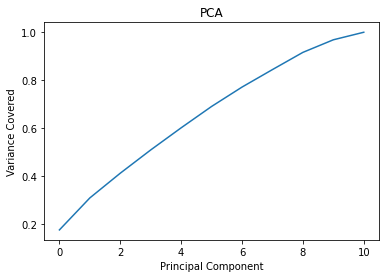

In [27]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [28]:
#Finding the multicollinerity
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

#let's check the values
vif

,vif,Features
0,1.170061,Gender
1,1.281453,Married
2,1.164056,Dependents
3,1.064482,Education
4,1.023721,Self_Employed
5,1.631032,ApplicantIncome
6,1.141132,CoapplicantIncome
7,1.711020,LoanAmount
8,1.049595,Loan_Amount_Term
9,1.008684,Credit_History


In [29]:
test=test.drop('Loan_Status',axis=1)

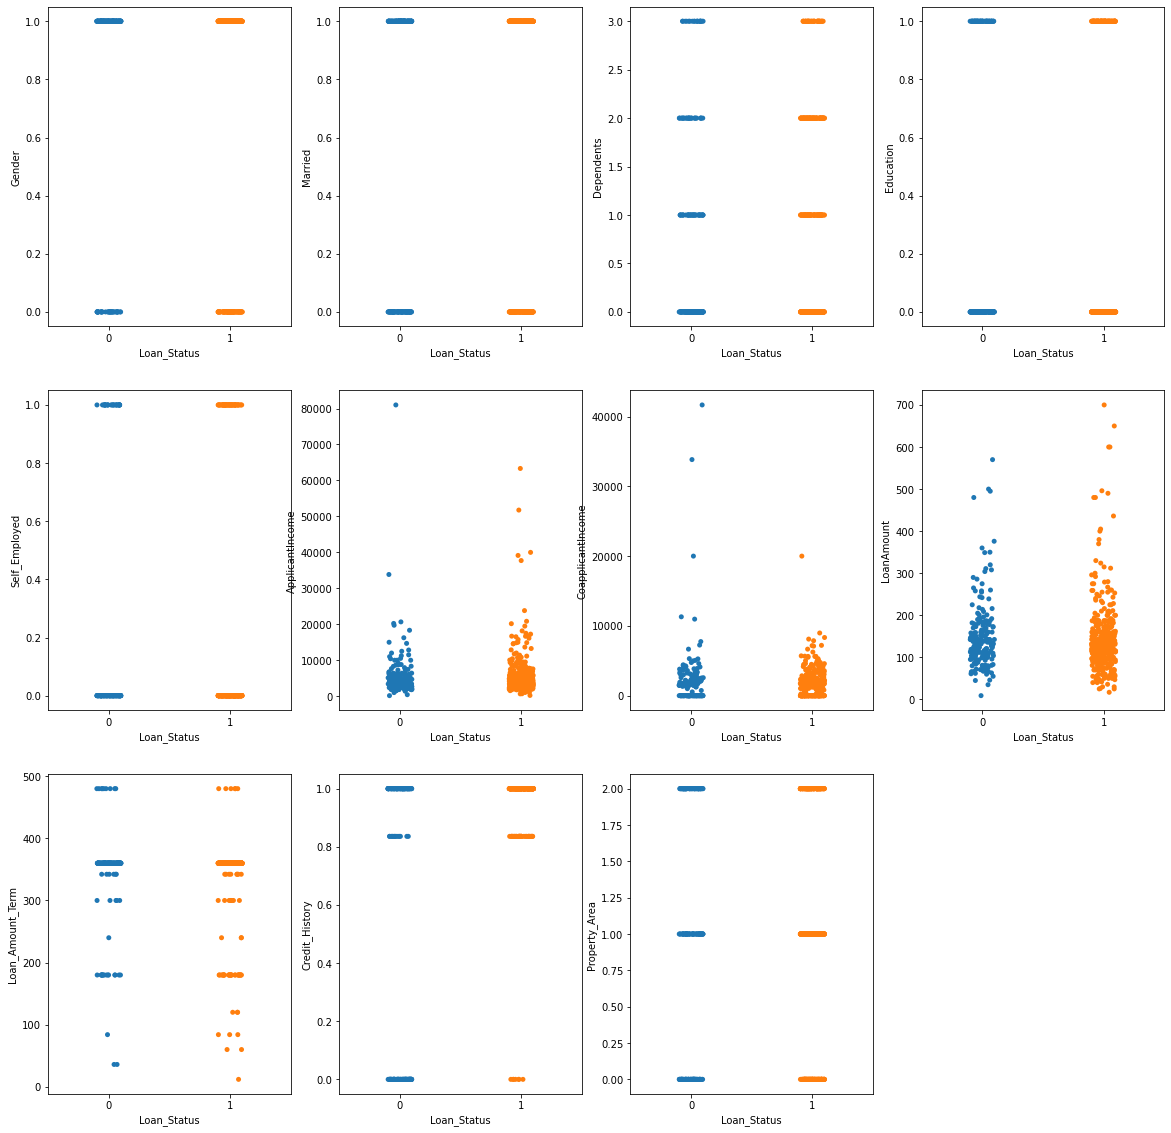

In [30]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in x:
    if plotno<=11:
        ax=plt.subplot(3,4,plotno)
        sns.stripplot(y,x[col])
        plt.xlabel('Loan_Status')
    plotno+=1
plt.show()

In [31]:
#model training 
#model building
from sklearn.linear_model import LogisticRegression

In [32]:
lgr=LogisticRegression()

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=345)

In [34]:
lgr.fit(x_train,y_train)
y_pred_lgr=lgr.predict(x_test)

In [35]:
print(confusion_matrix(y_pred_lgr,y_test))

[[ 20   5]
 [ 27 102]]


In [36]:
accuracy_score(y_pred_lgr,y_test)

0.7922077922077922

In [37]:
print(classification_report(y_pred_lgr,y_test))

              precision    recall  f1-score   support

           0       0.43      0.80      0.56        25
           1       0.95      0.79      0.86       129

    accuracy                           0.79       154
   macro avg       0.69      0.80      0.71       154
weighted avg       0.87      0.79      0.81       154



In [38]:
#Support Vector Machine
from sklearn.svm import SVC
svm=SVC()

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7792207792207793

In [40]:
y_pred_final5=model.predict(test)

In [41]:
svm.fit(x_train,y_train)

SVC()

In [42]:
y_pred_svm=svm.predict(x_test)

In [43]:
print(classification_report(y_pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.45      0.81      0.58        26
           1       0.95      0.80      0.87       128

    accuracy                           0.80       154
   macro avg       0.70      0.80      0.72       154
weighted avg       0.87      0.80      0.82       154



In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
model_dt=DecisionTreeClassifier().fit(x_train,y_train)
y_pred_dt=model_dt.predict(x_test)
model_rf=RandomForestClassifier().fit(x_train,y_train)
y_pred_rf=model_rf.predict(x_test)

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

In [47]:
accuracy_score(y_pred_dt,y_test)

0.6818181818181818

In [48]:
accuracy_score(y_pred_rf,y_test)

0.7597402597402597

In [49]:
auc_lgr=roc_auc_score(y_test,y_pred_lgr)
fpr_lgr, tpr_lgr, thresholds_lgr = roc_curve(y_test, y_pred_lgr)

auc_svm=roc_auc_score(y_test,y_pred_svm)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_svm)

auc_dt=roc_auc_score(y_test,y_pred_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_dt)

auc_rf=roc_auc_score(y_test,y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)

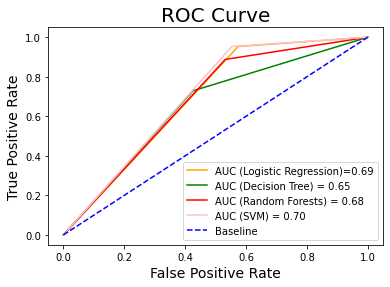

In [50]:
plt.plot(fpr_lgr,tpr_lgr,color='orange',label=f'AUC (Logistic Regression)={auc_lgr:.2f}')
plt.plot(fpr_dt, tpr_dt,color='green' ,label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf,color='red' ,label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_svm, tpr_svm,color='pink' ,label=f'AUC (SVM) = {auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [51]:
y_pred_final1=svm.predict(test)
y_pred_final2=lgr.predict(test)

In [52]:
y_pred_final3=model_dt.predict(test)

In [53]:
y_pred_final4=model_rf.predict(test)
y_pred_final4

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [60]:
my_submission = pd.DataFrame({'Loan_ID': loan_id, 'Loan_Status':y_pred_final1})
my_submission['Loan_Status']=my_submission['Loan_Status'].replace({1:'Y',0:'N'})
# you could use any filename. We choose submission here
my_submission.to_csv('submissions.csv', index=False)

In [61]:
my_submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y
